<a href="https://colab.research.google.com/github/thatpeacegirl/Lagos-Flood-Prediction/blob/main/Flood_Prediction_in_Lagos_Nigeria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview


**Project: Predicting Flood event dates in Lagos, Nigeria.**

This report presents an analysis aimed at predicting the likely date of the next potential flood event in Lagos, Nigera using historical weather data. By examining the relationships between key meteorological variables, patterns and trends denoting flood events are identified and analysed. Statistical modelling and machine learning techniques are employed to develop a predictive model which can help inform timely strategies and early disaster preparedness.


The weather data used in this analysis is sourced from [Visual Crossing](https://www.visualcrossing.com/). Historical weather data retrieved using the Weather Data API is sourced from private and public weather data sources such as Modern-Era Retrospective analysis for Research and Applications, Version 2 created by NASA, and Meteorological Assimilation Data Ingest System (MADIS) hosted by the United States of America. The data uploaded on these global sources are retrieved from local weather stations in Lagos, Nigeria.

# Preliminary Data Exploration

In [ ]:
# Mounting Google drive on colab
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
weather_df = pd.read_csv('/content/drive/MyDrive/Combined_2002_2024.csv')
flood_events_df = pd.read_csv('/content/drive/MyDrive/flood_events_2002_2024.csv')

In [ ]:
weather_df.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Lagos,01/01/2002,28.6,25.6,27.2,33.8,25.6,30.7,25.2,88.7,...,NaN,NaN,NaN,2002-01-01 06:57:21,2002-01-01 18:42:38,0.57,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,65201099999
1,Lagos,02/01/2002,33.1,26.1,29.0,39.4,26.1,33.8,25.1,80.5,...,NaN,NaN,NaN,2002-01-02 06:57:46,2002-01-02 18:43:08,0.61,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999
2,Lagos,03/01/2002,34.1,25.1,29.1,35.2,25.1,31.7,23.2,74.6,...,NaN,NaN,NaN,2002-01-03 06:58:11,2002-01-03 18:43:39,0.64,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999
3,Lagos,04/01/2002,33.1,33.1,33.1,39.4,39.4,39.4,24.1,59.3,...,NaN,NaN,NaN,2002-01-04 06:58:35,2002-01-04 18:44:10,0.68,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,65201099999
4,Lagos,05/01/2002,31.1,25.6,28.3,37.4,25.6,33.1,25.4,85.0,...,NaN,NaN,NaN,2002-01-05 06:58:59,2002-01-05 18:44:40,0.71,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,65201099999


In [ ]:
weather_df.shape

(8220, 33)

In [ ]:
weather_df.columns

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')

In [ ]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8220 entries, 0 to 8219
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              8220 non-null   object 
 1   datetime          8220 non-null   object 
 2   tempmax           7629 non-null   float64
 3   tempmin           7629 non-null   float64
 4   temp              7397 non-null   float64
 5   feelslikemax      7629 non-null   float64
 6   feelslikemin      7629 non-null   float64
 7   feelslike         7397 non-null   float64
 8   dew               7397 non-null   float64
 9   humidity          7397 non-null   float64
 10  precip            7397 non-null   float64
 11  precipprob        7397 non-null   float64
 12  precipcover       8220 non-null   float64
 13  preciptype        3414 non-null   object 
 14  snow              3816 non-null   float64
 15  snowdepth         3833 non-null   float64
 16  windgust          5442 non-null   float64


In [ ]:
flood_events_df.shape

(8222, 2)

In [ ]:
flood_events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8222 entries, 0 to 8221
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   datetime     8220 non-null   object 
 1   flood_event  78 non-null     float64
dtypes: float64(1), object(1)
memory usage: 128.6+ KB


# Data Preprocessing and Cleaning

In [ ]:
weather_df['datetime'] = pd.to_datetime(weather_df['datetime'], format='%d/%m/%Y')

In [ ]:
weather_df.duplicated().sum()

0

In [ ]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8220 entries, 0 to 8219
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              8220 non-null   object        
 1   datetime          8220 non-null   datetime64[ns]
 2   tempmax           7629 non-null   float64       
 3   tempmin           7629 non-null   float64       
 4   temp              7397 non-null   float64       
 5   feelslikemax      7629 non-null   float64       
 6   feelslikemin      7629 non-null   float64       
 7   feelslike         7397 non-null   float64       
 8   dew               7397 non-null   float64       
 9   humidity          7397 non-null   float64       
 10  precip            7397 non-null   float64       
 11  precipprob        7397 non-null   float64       
 12  precipcover       8220 non-null   float64       
 13  preciptype        3414 non-null   object        
 14  snow              3816 n

In [ ]:
weather_df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
datetime,8220,2013-04-02 12:00:00,2002-01-01 00:00:00,2007-08-17 18:00:00,2013-04-02 12:00:00,2018-11-17 06:00:00,2024-07-03 00:00:00,NaN
tempmax,7629.0,30.196789,0.0,29.0,31.1,33.0,56.0,5.921337
tempmin,7629.0,23.72151,0.0,23.1,24.1,25.5,34.6,4.610781
temp,7397.0,27.395917,21.4,26.1,27.3,28.6,34.6,1.607186
feelslikemax,7629.0,35.871045,0.0,33.5,37.2,40.6,56.0,7.816286
feelslikemin,7629.0,24.214799,0.0,23.1,24.1,25.5,45.1,5.253906
feelslike,7397.0,30.298013,21.4,27.4,30.1,32.8,45.1,3.528356
dew,7397.0,23.968839,8.2,23.4,24.2,25.0,66.5,1.93891
humidity,7397.0,82.810531,33.8,80.3,83.8,86.9,100.0,7.32745
precip,7397.0,5.067433,0.0,0.0,0.0,2.0,299.0,18.361834


In [ ]:
weather_df.isnull().sum()

name                   0
datetime               0
tempmax              591
tempmin              591
temp                 823
feelslikemax         591
feelslikemin         591
feelslike            823
dew                  823
humidity             823
precip               823
precipprob           823
precipcover            0
preciptype          4806
snow                4404
snowdepth           4387
windgust            2778
windspeed            242
winddir              850
sealevelpressure    1012
cloudcover          1179
visibility          1381
solarradiation      3288
solarenergy         3288
uvindex             3288
severerisk          7314
sunrise              366
sunset               366
moonphase            366
conditions          1179
description         1179
icon                1179
stations            1179
dtype: int64

In [ ]:
# Calculate the percentage of missing values for each column
missing_data_percent = weather_df.isnull().mean() * 100

# Filter and print columns with missing values
cols_with_missing = missing_data_percent[missing_data_percent > 0]

print(cols_with_missing)

tempmax              7.189781
tempmin              7.189781
temp                10.012165
feelslikemax         7.189781
feelslikemin         7.189781
feelslike           10.012165
dew                 10.012165
humidity            10.012165
precip              10.012165
precipprob          10.012165
preciptype          58.467153
snow                53.576642
snowdepth           53.369830
windgust            33.795620
windspeed            2.944039
winddir             10.340633
sealevelpressure    12.311436
cloudcover          14.343066
visibility          16.800487
solarradiation      40.000000
solarenergy         40.000000
uvindex             40.000000
severerisk          88.978102
sunrise              4.452555
sunset               4.452555
moonphase            4.452555
conditions          14.343066
description         14.343066
icon                14.343066
stations            14.343066
dtype: float64


In [ ]:
weather_df['name'].value_counts()

name
Lagos    7490
lagos     730
Name: count, dtype: int64

In [ ]:
weather_df['preciptype'].value_counts()

preciptype
rain    3414
Name: count, dtype: int64

In [ ]:
# Fill NaN values of preciptype with 'no rain'
weather_df['preciptype'].fillna('no rain', inplace=True)

In [ ]:
weather_df['severerisk'].value_counts()

severerisk
30.0     256
60.0     238
10.0     191
75.0     179
100.0     39
38.0       2
15.0       1
Name: count, dtype: int64

In [ ]:
weather_df['conditions'].value_counts()

conditions
Partially cloudy          3873
Rain, Partially cloudy    3001
Clear                       74
Rain, Overcast              72
Overcast                    19
Rain                         2
Name: count, dtype: int64

In [ ]:
weather_df['snow'].unique()

array([  nan,  20.5,  16.6,  14.8,  13. ,  11.2,  18.4,  37.1,  31.7,
        29.5,  22.3,  83.5,  24.1,  46.4,  44.6,  59.4,  51.8,  57.6,
       111.2,  53.6,  68.4,   9.4,  55.4,  25.9,  35.3,  27.7,  33.5,
        40.7,  38.9,  48.2,  31.3,  81.4,  63. ,  74.2,   0. ])

In [ ]:
weather_df['snowdepth'].unique()

array([ nan, 13. , 14.8, 16.6, 18.4, 12.7,  9.4, 11.2, 20.4, 33.5, 22.3,
       29.5, 13.4, 40.7, 42.5, 14.7, 16.7, 14.6, 25.9, 18.3, 44.3, 55.4,
       20.5, 38. , 27.7, 31.3, 48.2, 13.9, 52. , 16.5, 64.8, 51.8, 16.4,
       63. , 46.4,  9.5, 24.1, 70.2,  0. ,  7.6, 12.9, 11.6, 18. , 27.5,
       22.2, 13.1, 28.6, 35.3, 27.1, 32.8, 28.3,  5.4, 37.1, 77.8, 21.9,
       46.5, 30.9, 54.4, 23.6, 18.2,  7.7, 21.8, 82.3])

In [ ]:
# Fill some numerical columns by interpolation
interpolation_columns = ['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex']

for column in interpolation_columns:
  weather_df[column].interpolate(method='linear', inplace=True)

In [ ]:
# Extract year from the date column
weather_df['year'] = weather_df['datetime'].dt.year

# List of columns to check for null values
columns_to_check = ['uvindex', 'solarenergy', 'solarradiation']

# Dictionary to store years with missing values for each column
missing_values_years = {col: sorted(weather_df[weather_df[col].isnull()]['year'].unique()) for col in columns_to_check}

# Print the results in a nicely formatted manner
for col, years in missing_values_years.items():
    years_str = ', '.join(map(str, years))
    print(f"Years with missing values in {col}: \n{years_str if years_str else 'None'}")
    print()

# Check if the years are the same across the columns
common_years = set(missing_values_years['uvindex']).intersection(
    missing_values_years['solarenergy'], missing_values_years['solarradiation']
)

print(f"Common years with missing values across all columns: \n{', '.join(map(str, common_years)) if common_years else 'None'}")

Years with missing values in uvindex: 
2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009

Years with missing values in solarenergy: 
2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009

Years with missing values in solarradiation: 
2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009

Common years with missing values across all columns: 
2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009


In [ ]:
# Fill windgust column
weather_df['windgust'].fillna(weather_df['windspeed'], inplace=True)

In [ ]:
# Drop columns
cols_to_drop = ['name', 'snow', 'snowdepth', 'severerisk', 'description', 'icon', 'stations', 'solarradiation', 'solarenergy', 'uvindex']
weather_df.drop(columns=cols_to_drop, inplace=True)

In [ ]:
weather_df.sunrise.unique()

array(['2002-01-01 06:57:21', '2002-01-02 06:57:46',
       '2002-01-03 06:58:11', ..., '2024-07-01 06:35:47',
       '2024-07-02 06:36:01', '2024-07-03 06:36:15'], dtype=object)

In [ ]:
weather_df.moonphase.unique()

array([0.57, 0.61, 0.64, 0.68, 0.71, 0.75, 0.78, 0.82, 0.85, 0.89, 0.93,
       0.96, 0.  , 0.03, 0.06, 0.09, 0.13, 0.16, 0.19, 0.22, 0.25, 0.29,
       0.32, 0.35, 0.39, 0.42, 0.45, 0.5 , 0.52, 0.55, 0.59, 0.62, 0.66,
       0.69, 0.76, 0.8 , 0.83, 0.87, 0.9 , 0.94, 0.97, 0.04, 0.07, 0.1 ,
       0.14, 0.17, 0.2 , 0.24, 0.3 , 0.34, 0.37, 0.4 , 0.44, 0.47, 0.54,
       0.6 , 0.67, 0.77, 0.81, 0.84, 0.88, 0.91, 0.98, 0.05, 0.08, 0.11,
       0.15, 0.18, 0.46, 0.56, 0.79, 0.86, 0.92, 0.02, 0.23, 0.41, 0.48,
       0.58, 0.21, 0.36, 0.43, 0.53, 0.63, 0.72, 0.95, 0.12, 0.38, 0.65,
       0.7 , 0.73, 0.27, 0.31, 0.28, 0.26, 0.33, 0.74,  nan])

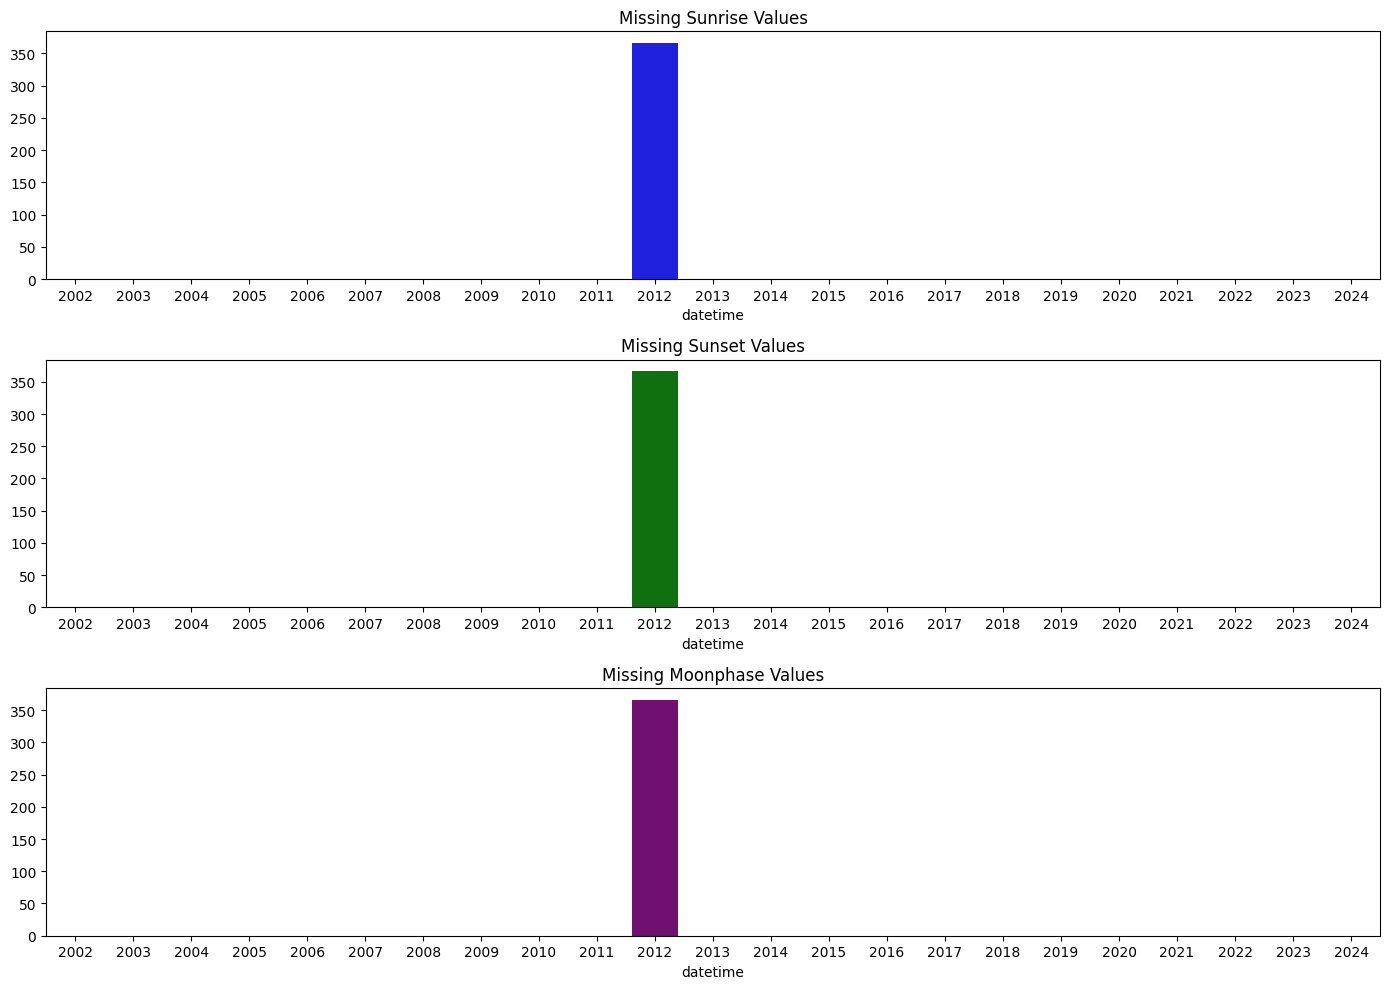

In [ ]:
# Create boolean masks for missing values
sunrise_missing = weather_df['sunrise'].isnull()
sunset_missing = weather_df['sunset'].isnull()
moonphase_missing = weather_df['moonphase'].isnull()

# Group by year and count missing values
missing_counts = {
    'sunrise_missing': sunrise_missing.groupby(weather_df['datetime'].dt.year).sum(),
    'sunset_missing': sunset_missing.groupby(weather_df['datetime'].dt.year).sum(),
    'moonphase_missing': moonphase_missing.groupby(weather_df['datetime'].dt.year).sum()
}

# Plotting
plt.figure(figsize=(14, 10))

# Plot missing sunrise values
plt.subplot(3, 1, 1)
sns.barplot(x=missing_counts['sunrise_missing'].index, y=missing_counts['sunrise_missing'].values, color='blue')
plt.title('Missing Sunrise Values')

# Plot missing sunset values
plt.subplot(3, 1, 2)
sns.barplot(x=missing_counts['sunset_missing'].index, y=missing_counts['sunset_missing'].values, color='green')
plt.title('Missing Sunset Values')

# Plot missing moonphase values
plt.subplot(3, 1, 3)
sns.barplot(x=missing_counts['moonphase_missing'].index, y=missing_counts['moonphase_missing'].values, color='purple')
plt.title('Missing Moonphase Values')

plt.tight_layout()
plt.show()

In [ ]:
# Convert columns to datetime
weather_df['sunrise'] = pd.to_datetime(weather_df['sunrise'], format='%Y-%m-%d %H:%M:%S').dt.time
weather_df['sunset'] = pd.to_datetime(weather_df['sunset'], format='%Y-%m-%d %H:%M:%S').dt.time

In [ ]:
# Interpolate to fill missing sunrise and sunset values
weather_df['sunrise'] = weather_df['sunrise'].interpolate(method='time')
weather_df['sunset'] = weather_df['sunset'].interpolate(method='time')

In [ ]:
# Use forward fill to fill sunrise and sunset columns as interpolation failed
weather_df['sunrise'] = weather_df['sunrise'].fillna(method='ffill')
weather_df['sunset'] = weather_df['sunset'].fillna(method='ffill')

In [ ]:
# Fill moonphase with mean of column
mean_moonphase = weather_df['moonphase'].mean()
weather_df['moonphase'] = weather_df['moonphase'].fillna(mean_moonphase)

In [ ]:
# Fill conditions column
mode_condition = weather_df['conditions'].mode()[0]
weather_df['conditions'].fillna(mode_condition, inplace=True)

In [ ]:
weather_df.isnull().sum()

datetime            0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
precipcover         0
preciptype          0
windgust            0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
sunrise             0
sunset              0
moonphase           0
conditions          0
year                0
dtype: int64

In [ ]:
# Fill null values in flood_events df with 0
flood_events_df['flood_event'].fillna(0, inplace=True)

In [ ]:
flood_events_df.isnull().sum()

datetime       2
flood_event    0
dtype: int64

In [ ]:
# Drop extra rows in dataset causing null values to appear in datetime
flood_events_df.dropna(subset=['datetime'], inplace=True)

In [ ]:
flood_events_df.isnull().sum()

datetime       0
flood_event    0
dtype: int64

In [ ]:
flood_events_df.shape

(8220, 2)

In [ ]:
flood_events_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8220 entries, 0 to 8219
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   datetime     8220 non-null   object 
 1   flood_event  8220 non-null   float64
dtypes: float64(1), object(1)
memory usage: 192.7+ KB


In [ ]:
# convert datetime column to date datatype
flood_events_df['datetime'] = pd.to_datetime(flood_events_df['datetime'], format='%d/%m/%Y')

**Merge Dataframes**

In [ ]:
flood_weather_df = pd.merge(weather_df, flood_events_df, on='datetime', how='inner')

In [ ]:
flood_weather_df.drop(columns='year', inplace=True)

In [ ]:
flood_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8220 entries, 0 to 8219
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   datetime          8220 non-null   datetime64[ns]
 1   tempmax           8220 non-null   float64       
 2   tempmin           8220 non-null   float64       
 3   temp              8220 non-null   float64       
 4   feelslikemax      8220 non-null   float64       
 5   feelslikemin      8220 non-null   float64       
 6   feelslike         8220 non-null   float64       
 7   dew               8220 non-null   float64       
 8   humidity          8220 non-null   float64       
 9   precip            8220 non-null   float64       
 10  precipprob        8220 non-null   float64       
 11  precipcover       8220 non-null   float64       
 12  preciptype        8220 non-null   object        
 13  windgust          8220 non-null   float64       
 14  windspeed         8220 n

In [ ]:
flood_weather_df.head()

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,sunrise,sunset,moonphase,conditions,flood_event
0,2002-01-01,28.6,25.6,27.2,33.8,25.6,30.7,25.2,88.7,0.0,...,16.6,279.9,1010.9,90.0,6.5,06:57:21,18:42:38,0.57,Partially cloudy,0.0
1,2002-01-02,33.1,26.1,29.0,39.4,26.1,33.8,25.1,80.5,0.0,...,18.4,11.0,1011.2,90.0,8.4,06:57:46,18:43:08,0.61,Partially cloudy,0.0
2,2002-01-03,34.1,25.1,29.1,35.2,25.1,31.7,23.2,74.6,0.0,...,18.4,218.6,1011.7,90.0,4.9,06:58:11,18:43:39,0.64,Partially cloudy,0.0
3,2002-01-04,33.1,33.1,33.1,39.4,39.4,39.4,24.1,59.3,0.0,...,14.8,170.0,1010.2,90.0,8.0,06:58:35,18:44:10,0.68,Partially cloudy,0.0
4,2002-01-05,31.1,25.6,28.3,37.4,25.6,33.1,25.4,85.0,0.0,...,20.5,193.4,1010.0,90.0,5.3,06:58:59,18:44:40,0.71,Partially cloudy,0.0


In [ ]:
flood_weather_df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
datetime,8220,2013-04-02 12:00:00,2002-01-01 00:00:00,2007-08-17 18:00:00,2013-04-02 12:00:00,2018-11-17 06:00:00,2024-07-03 00:00:00,NaN
tempmax,8220.0,30.120852,0.0,29.0,31.0,33.0,56.0,5.764498
tempmin,8220.0,23.908887,0.0,23.1,24.2,25.8,34.6,4.555789
temp,8220.0,27.477451,21.4,26.2,27.4,28.7,34.6,1.689698
feelslikemax,8220.0,35.727591,0.0,33.2,36.9,40.5,56.0,7.669281
feelslikemin,8220.0,24.531235,0.0,23.1,24.2,25.9,45.1,5.348203
feelslike,8220.0,30.498297,21.4,27.4,30.2,33.1,45.1,3.701118
dew,8220.0,24.034361,8.2,23.5,24.3,25.044344,66.5,1.886943
humidity,8220.0,82.719453,33.8,80.0,83.6,86.9,100.0,7.287201
precip,8220.0,4.624495,0.0,0.0,0.0,1.1,299.0,17.522391


# Exploratory Data Analysis

Visualize how temperature changes over time

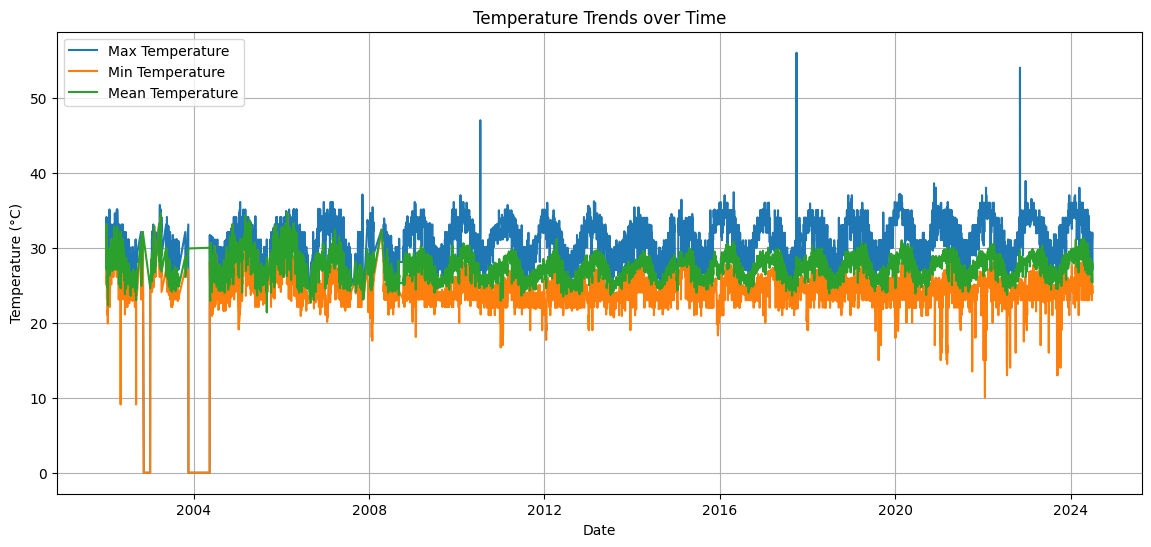

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(flood_weather_df['datetime'], flood_weather_df['tempmax'], label='Max Temperature')
plt.plot(flood_weather_df['datetime'], flood_weather_df['tempmin'], label='Min Temperature')
plt.plot(flood_weather_df['datetime'], flood_weather_df['temp'], label='Mean Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Trends over Time')
plt.legend()
plt.grid(True)
plt.show()

Visualize how feelslike temperature changes over time

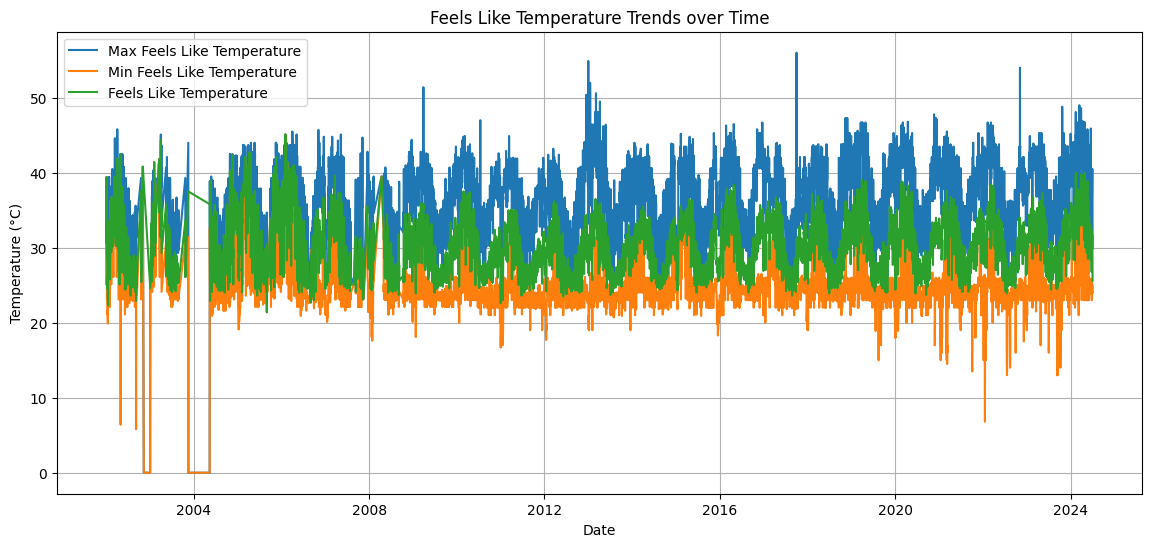

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(flood_weather_df['datetime'], flood_weather_df['feelslikemax'], label='Max Feels Like Temperature')
plt.plot(flood_weather_df['datetime'], flood_weather_df['feelslikemin'], label='Min Feels Like Temperature')
plt.plot(flood_weather_df['datetime'], flood_weather_df['feelslike'], label='Feels Like Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Feels Like Temperature Trends over Time')
plt.legend()
plt.grid(True)
plt.show()

Outliers in temperature and feelslike temperature

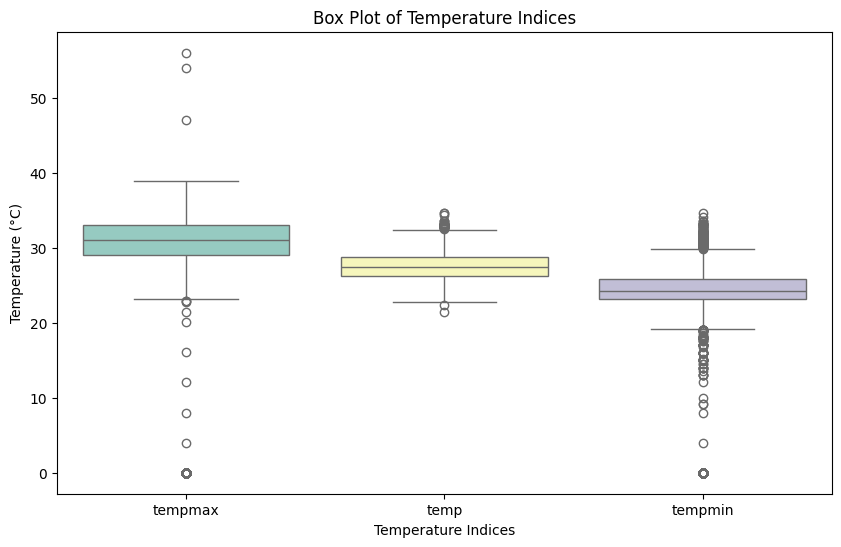

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=flood_weather_df[['tempmax', 'temp', 'tempmin']], palette='Set3')
plt.title('Box Plot of Temperature Indices')
plt.xlabel('Temperature Indices')
plt.ylabel('Temperature (°C)')
plt.show()

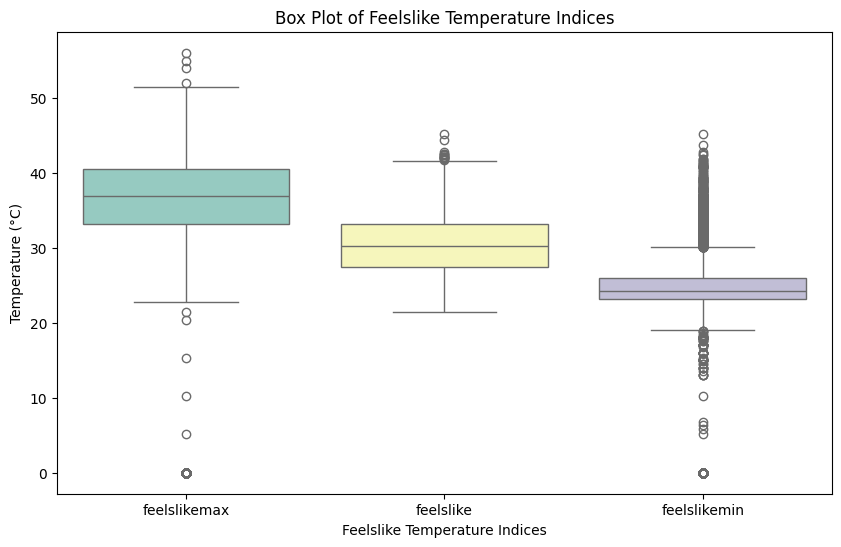

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=flood_weather_df[['feelslikemax', 'feelslike', 'feelslikemin']], palette='Set3')
plt.title('Box Plot of Feelslike Temperature Indices')
plt.xlabel('Feelslike Temperature Indices')
plt.ylabel('Temperature (°C)')
plt.show()

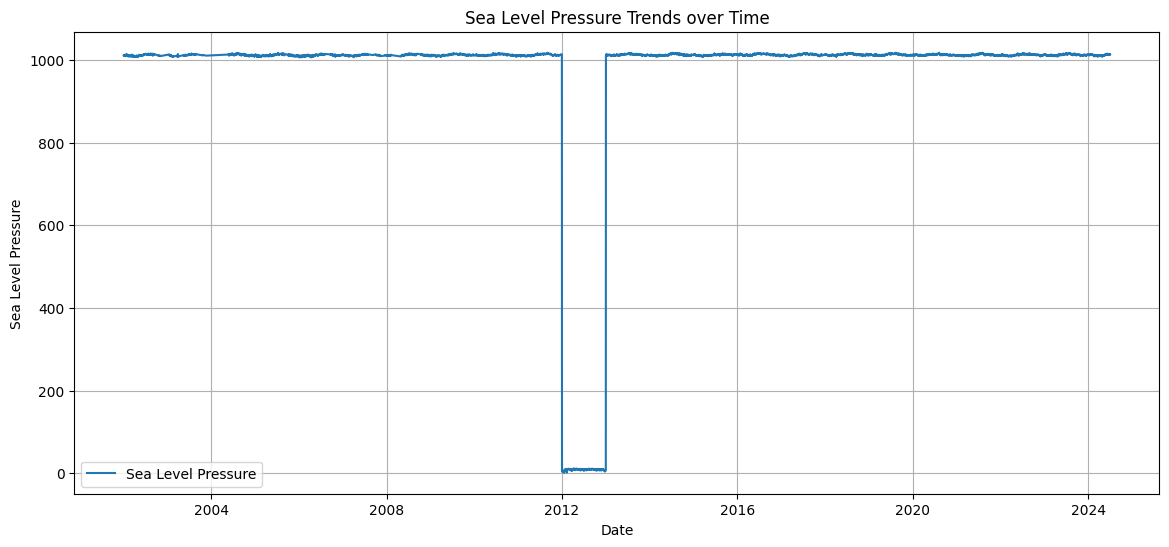

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(flood_weather_df['datetime'], flood_weather_df['sealevelpressure'], label='Sea Level Pressure')
plt.xlabel('Date')
plt.ylabel('Sea Level Pressure')
plt.title('Sea Level Pressure Trends over Time')
plt.legend()
plt.grid(True)
plt.show()

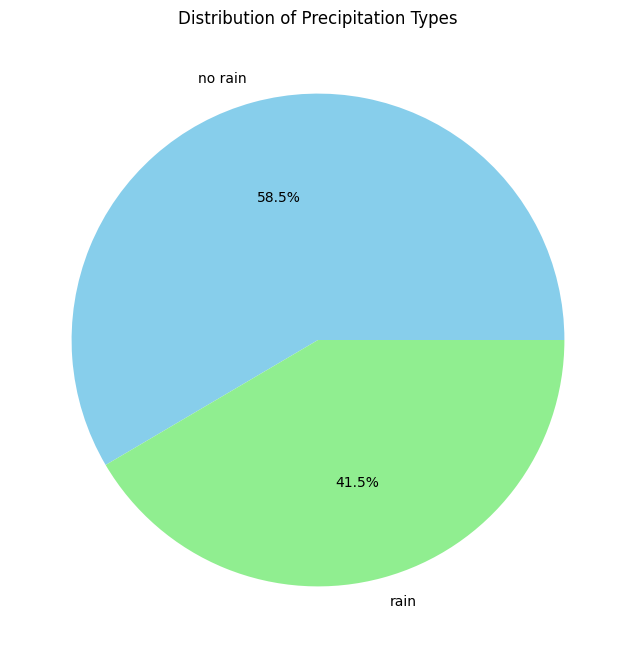

In [ ]:
# Pie chart of precipitation type distribution
plt.figure(figsize=(8, 8))
flood_weather_df['preciptype'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Precipitation Types')
plt.ylabel('')
plt.show()

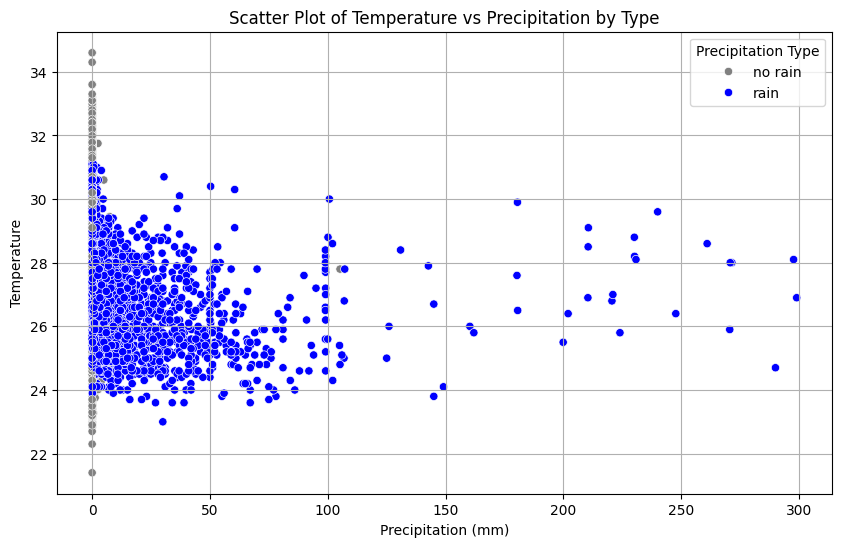

In [ ]:
# Define colors for different precipitation types
color_map = {'rain': 'blue','no rain': 'gray'}

plt.figure(figsize=(10, 6))
sns.scatterplot(x='precip', y='temp', data=flood_weather_df, hue='preciptype', palette=color_map)
plt.xlabel('Precipitation (mm)')
plt.ylabel('Temperature')
plt.title('Scatter Plot of Temperature vs Precipitation by Type')
plt.grid(True)
plt.legend(title='Precipitation Type', loc='upper right')
plt.show()

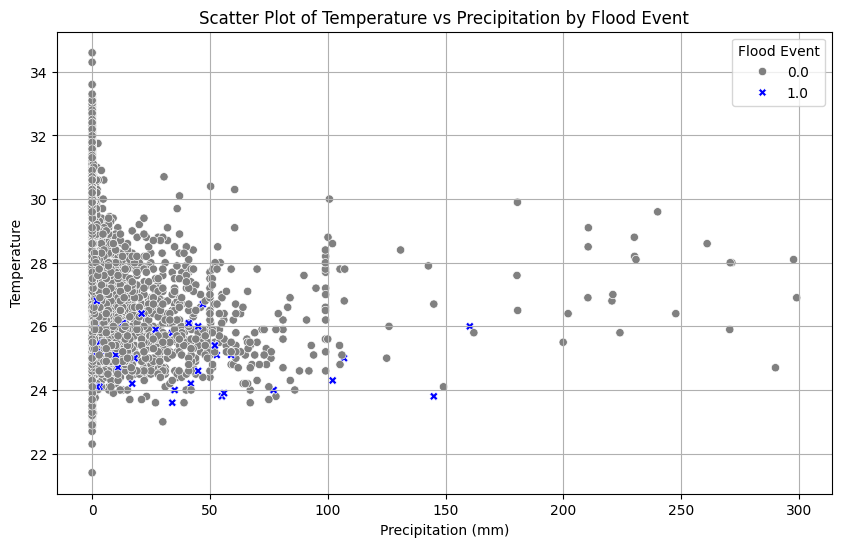

In [ ]:
color_map = {0: 'gray', 1: 'blue'}

# Plotting scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='precip', y='temp', data=flood_weather_df, hue='flood_event', palette=color_map, style='flood_event')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Temperature')
plt.title('Scatter Plot of Temperature vs Precipitation by Flood Event')
plt.grid(True)
plt.legend(title='Flood Event', loc='upper right')
plt.show()

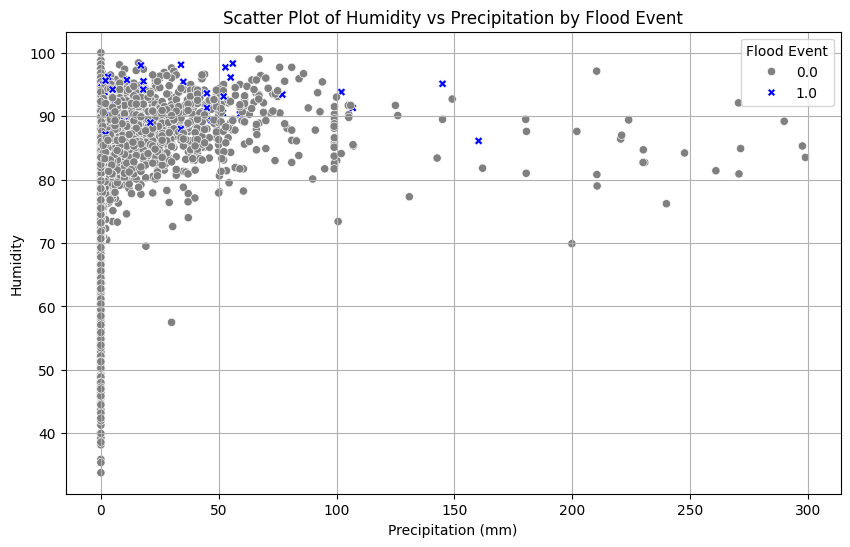

In [ ]:
color_map = {0: 'gray', 1: 'blue'}

# Plotting scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='precip', y='humidity', data=flood_weather_df, hue='flood_event', palette=color_map, style='flood_event')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Humidity')
plt.title('Scatter Plot of Humidity vs Precipitation by Flood Event')
plt.grid(True)
plt.legend(title='Flood Event', loc='upper right')
plt.show()

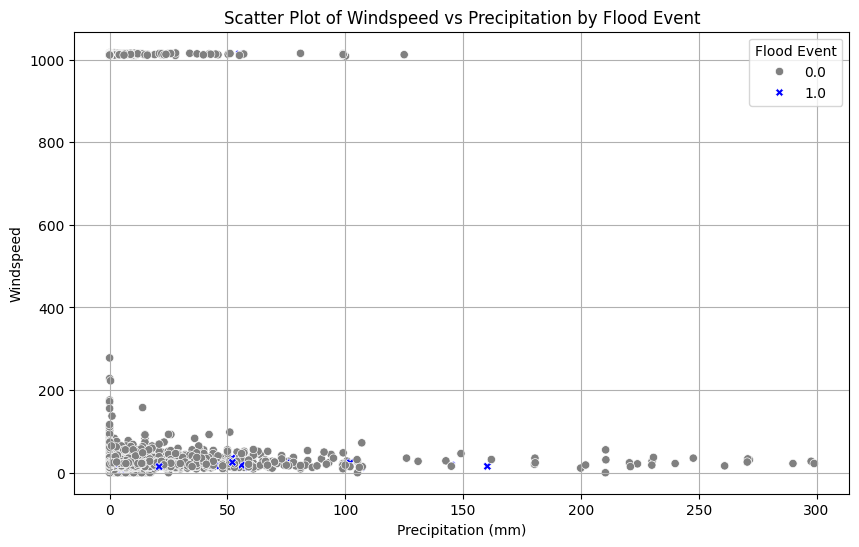

In [ ]:
color_map = {0: 'gray', 1: 'blue'}

# Plotting scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='precip', y='windspeed', data=flood_weather_df, hue='flood_event', palette=color_map, style='flood_event')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Windspeed')
plt.title('Scatter Plot of Windspeed vs Precipitation by Flood Event')
plt.grid(True)
plt.legend(title='Flood Event', loc='upper right')
plt.show()

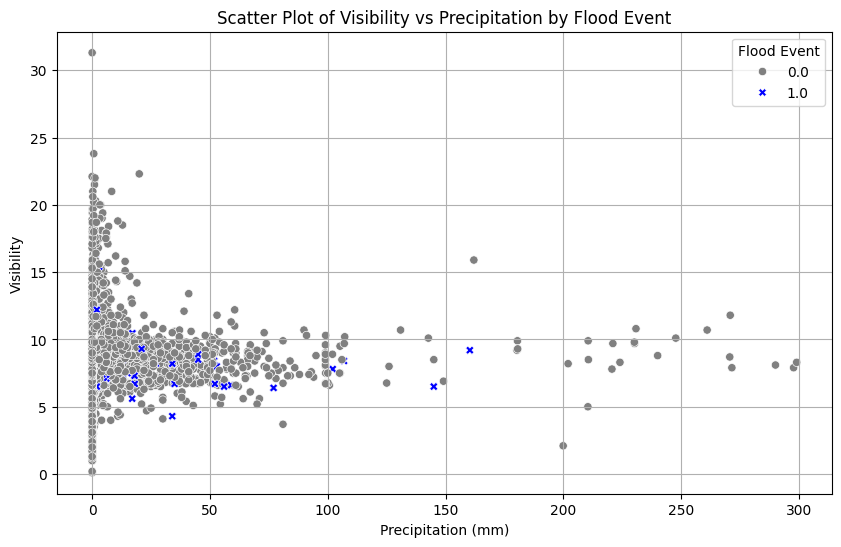

In [ ]:
color_map = {0: 'gray', 1: 'blue'}

# Plotting scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='precip', y='visibility', data=flood_weather_df, hue='flood_event', palette=color_map, style='flood_event')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Visibility')
plt.title('Scatter Plot of Visibility vs Precipitation by Flood Event')
plt.grid(True)
plt.legend(title='Flood Event', loc='upper right')
plt.show()

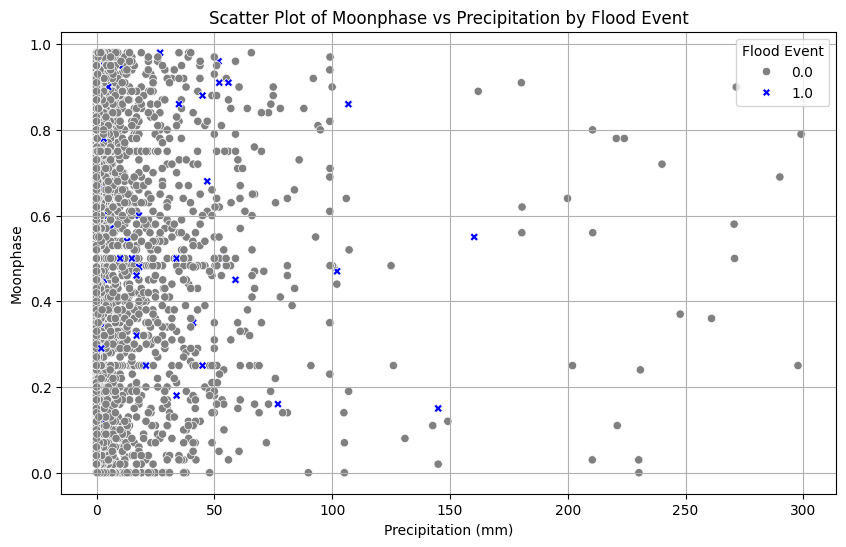

In [ ]:
color_map = {0: 'gray', 1: 'blue'}

# Plotting scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='precip', y='moonphase', data=flood_weather_df, hue='flood_event', palette=color_map, style='flood_event')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Moonphase')
plt.title('Scatter Plot of Moonphase vs Precipitation by Flood Event')
plt.grid(True)
plt.legend(title='Flood Event', loc='upper right')
plt.show()

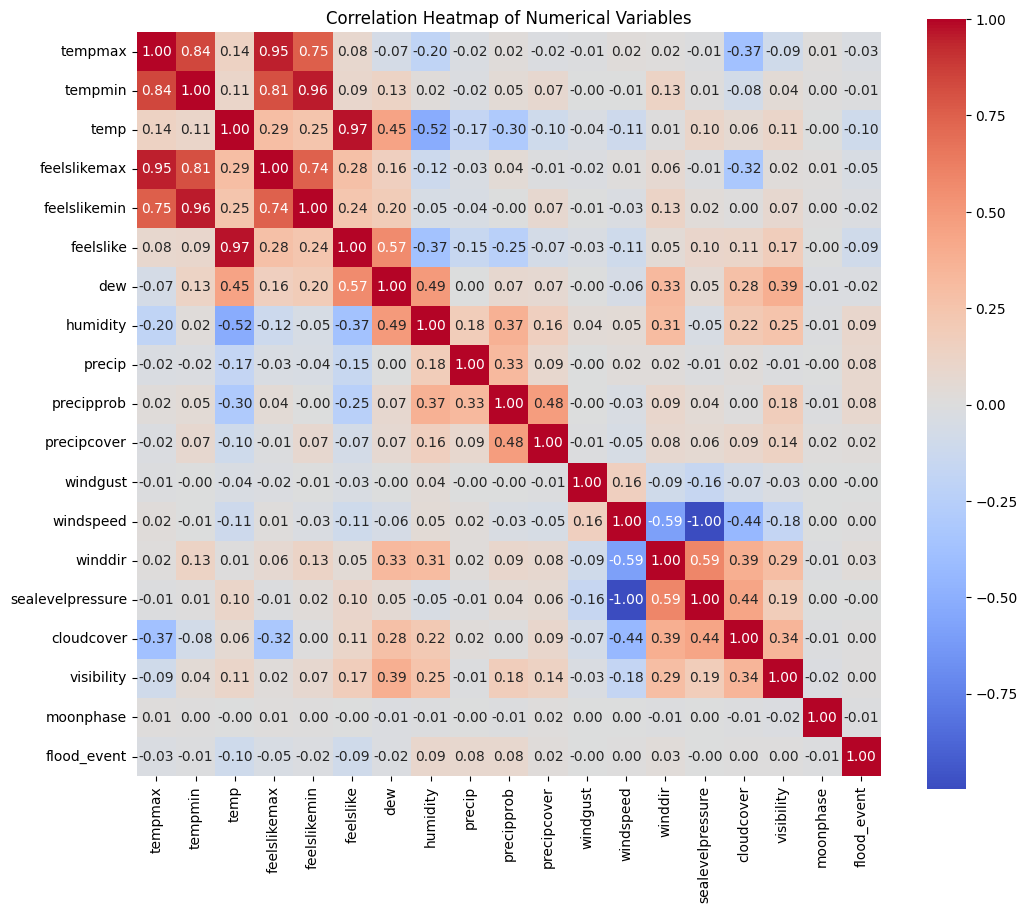

In [ ]:
numerical_variables = ['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 'moonphase', 'flood_event']
numerical_df = flood_weather_df[numerical_variables]

# Calculate correlation matrix
corr_matrix = numerical_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


# Modelling

Categorical encoding for columns

In [ ]:
flood_weather_df['preciptype'] = pd.Categorical(flood_weather_df['preciptype'], categories=['no rain', 'rain'], ordered=True)
flood_weather_df['preciptype'] = flood_weather_df['preciptype'].cat.codes

In [ ]:
# # Convert datetime to string
# flood_weather_df['datetime'] = flood_weather_df['datetime'].dt.strftime('%d/%m/%Y')
# flood_weather_df[['day', 'month', 'year']] = flood_weather_df['datetime'].str.split('/', expand=True)

# # Convert day, month, and year to integers
# flood_weather_df['day'] = flood_weather_df['day'].astype(int)
# flood_weather_df['month'] = flood_weather_df['month'].astype(int)
# flood_weather_df['year'] = flood_weather_df['year'].astype(int)

In [ ]:
# drop other categorical columns and original datetime column
# flood_weather_df.drop(columns=['datetime', 'sunrise', 'sunset', 'conditions'], inplace=True)
flood_weather_df.drop(columns=['sunrise', 'sunset', 'conditions'], inplace=True)

In [ ]:
flood_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8220 entries, 0 to 8219
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   datetime          8220 non-null   datetime64[ns]
 1   tempmax           8220 non-null   float64       
 2   tempmin           8220 non-null   float64       
 3   temp              8220 non-null   float64       
 4   feelslikemax      8220 non-null   float64       
 5   feelslikemin      8220 non-null   float64       
 6   feelslike         8220 non-null   float64       
 7   dew               8220 non-null   float64       
 8   humidity          8220 non-null   float64       
 9   precip            8220 non-null   float64       
 10  precipprob        8220 non-null   float64       
 11  precipcover       8220 non-null   float64       
 12  preciptype        8220 non-null   int8          
 13  windgust          8220 non-null   float64       
 14  windspeed         8220 n

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            flood_event   No. Observations:                 6576
Model:                 ARIMA(1, 1, 1)   Log Likelihood                7451.316
Date:                Sat, 06 Jul 2024   AIC                         -14896.632
Time:                        22:24:28   BIC                         -14876.259
Sample:                    01-01-2002   HQIC                        -14889.589
                         - 01-02-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3285      0.002    133.815      0.000       0.324       0.333
ma.L1         -0.9995      0.001  -1028.968      0.000      -1.001      -0.998
sigma2         0.0061   1.54e-05    392.870      0.0

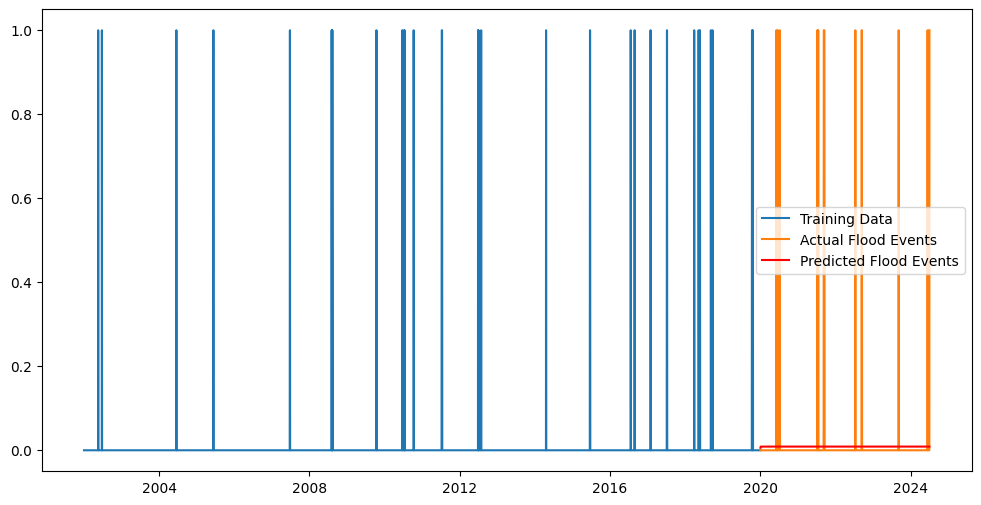

Accuracy: 97.99%
No flood events predicted in the next 30 days.


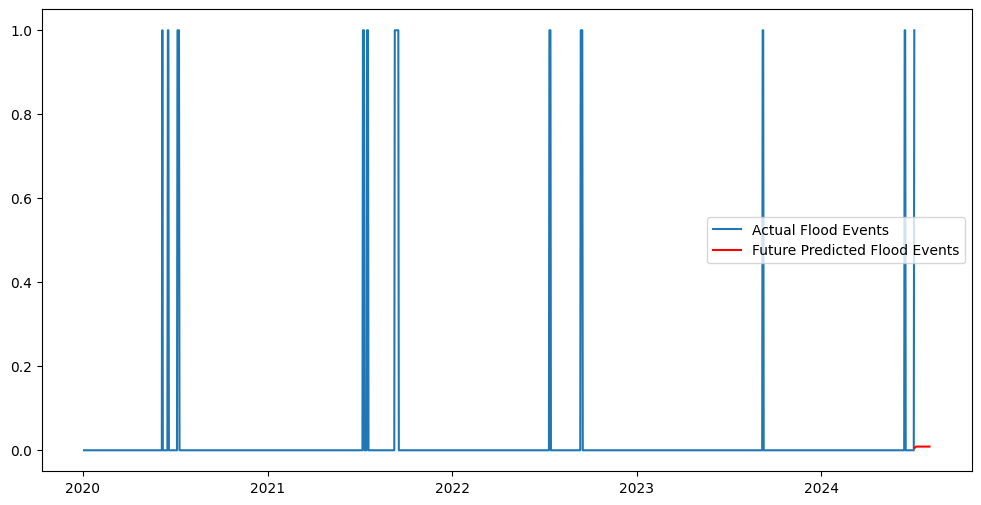

In [ ]:
# Split the data into training and testing sets
train_size = int(len(flood_weather_df) * 0.8)
train, test = flood_weather_df.iloc[:train_size], flood_weather_df.iloc[train_size:]

# Ensure the target variable is numeric and contains only 'flood_event'
train_data = train['flood_event'].astype(float)
test_data = test['flood_event'].astype(float)

# Fit the ARIMA model
model = ARIMA(train_data, order=(1, 1, 1))
model_fit = model.fit()

# Print a summary of the model
print(model_fit.summary())

# Forecast the test set
forecast = model_fit.forecast(steps=len(test))

# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['flood_event'], label='Training Data')
plt.plot(test.index, test['flood_event'], label='Actual Flood Events')
plt.plot(test.index, forecast, label='Predicted Flood Events', color='red')
plt.legend()
plt.show()

# Convert predictions to binary (0 or 1) based on a threshold
threshold = 0.5
forecast_binary = [1 if x > threshold else 0 for x in forecast]

# Calculate accuracy
accuracy = accuracy_score(test['flood_event'], forecast_binary)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Forecast future flood events for the next 30 days
future_forecast = model_fit.forecast(steps=30)

# Convert future forecast to binary (0 or 1) based on a threshold
future_forecast_binary = [1 if x > threshold else 0 for x in future_forecast]

# Find the next date with a predicted flood event
next_flood_date = None
for i, val in enumerate(future_forecast_binary):
    if val == 1:
        next_flood_date = pd.date_range(start=test.index[-1], periods=31, freq='D')[1:][i]
        break

if next_flood_date:
    print(f"The next predicted flood event is on {next_flood_date.date()}.")
else:
    print("No flood events predicted in the next 30 days.")

# Plot the future forecast
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['flood_event'], label='Actual Flood Events')
plt.plot(pd.date_range(start=test.index[-1], periods=31, freq='D')[1:], future_forecast, label='Future Predicted Flood Events', color='red')
if next_flood_date:
    plt.axvline(x=next_flood_date, color='blue', linestyle='--', label='Next Predicted Flood')
plt.legend()
plt.show()